In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import itertools
import scipy.stats as scs
import statsmodels.api as sm

In [2]:
from get_clean_data_DTR import get_data, clean_data, get_feats, get_target
from plot_results_and_residuals import plot_results, plot_residuals

<h3>Code to get features from df - BIG Plans = ptp cnt > 100000</h3>

In [31]:
def get_clean_feats(year):
    prelim_df = get_data(year)
    df = clean_data(prelim_df, year)
    df = df[df['part_cnt_{}'.format(year)] > 100000]
    feats = get_feats(df, year)
    X = feats[['eir','fndng_tgt_{}'.format(year), 'tgt_nrml_cost_{}'.format(year), 'pmts_to_part_{}'.format(year)]]
    X['eir_ft'] = X['eir']/100 * X['fndng_tgt_{}'.format(year)]
    X['eir_tnc'] = X['eir']/100 * X['tgt_nrml_cost_{}'.format(year)]
    X['eir_pmt'] = X['eir']/100 * X['pmts_to_part_{}'.format(year)]
    y = get_target(df, year)
    y = y[df['part_cnt_{}'.format(year)] > 100000]
    return X, y

<h3>Features:</h3>
    <ul><li>Prior year funding target
        <li>Prior year target normal cost (expected growth in funding target)
        <li>Prior year benefits paid
        <li>Prior year effective interest rate (single effective rate that approximates the effect of 3-tiered rates actually used to value funding target
    </ul>

<h3>Interaction Features: Interest on FT, TNC, Pmts</h3>

In [9]:
X, y = get_clean_feats(2014)

In [10]:
len(X), len(y)

(218, 218)

<h2>Fit a Linear Regression</h2>

In [11]:
def summary_model(X, y, label='scatter'):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    summary = model.summary()
    return summary

In [12]:
summary_model(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         fndng_tgt_2015   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.254e+04
Date:                Wed, 28 Nov 2018   Prob (F-statistic):          1.65e-271
Time:                        11:46:13   Log-Likelihood:                -4584.9
No. Observations:                 218   AIC:                             9186.
Df Residuals:                     210   BIC:                             9213.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.275e+09   3.76e+09      0.872      0.384   -4.13e+09    1.07e+10
eir                -4.772e+08   5.78e+08     -0.826      0.410   -1.62e+09    6.62e+08
fndng_tgt_2014         1.4272      1.089      1.311      0.191      -0.719       3.573
tgt_nrml_cost_2014    22.7589     14.327      1.589      0.114      -5.484      51.002
pmts_to_part_2014    -11.2851      9.307     -1.213      0.227     -29.632       7.061
eir_ft                -6.1597     16.614     -0.371      0.711     -38.911      26.592
eir_tnc             -316.7225    219.040     -1.446      0.150    -748.521     115.076
eir_pmt              164.4113    142.339      1.155      0.249    -116.185     445.008
==============================================================================
Omnibus:                      181.765   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1851.292
Skew:                           3.421   Prob(JB):                         0.00
Kurtosis:                      15.530   Cond. No.                     2.15e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h1>Test on 2015 Data</h1>

In [13]:
'''Fit Model (on 2014 data) to Test Predictions'''
X = sm.add_constant(X)
lin_model = sm.OLS(y, X).fit()

In [14]:
X15, y15 = get_clean_feats(2015)

In [15]:
len(X15), len(y15)

(227, 227)

In [16]:
X15 = sm.add_constant(X15)
yhat15 = lin_model.predict(X15)

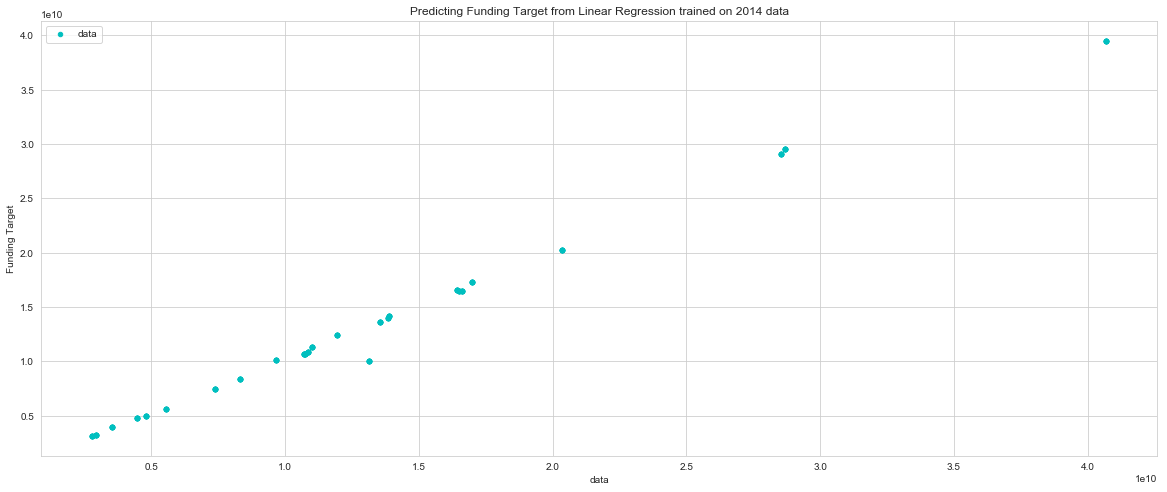

In [17]:
plot_results(y15,yhat15)

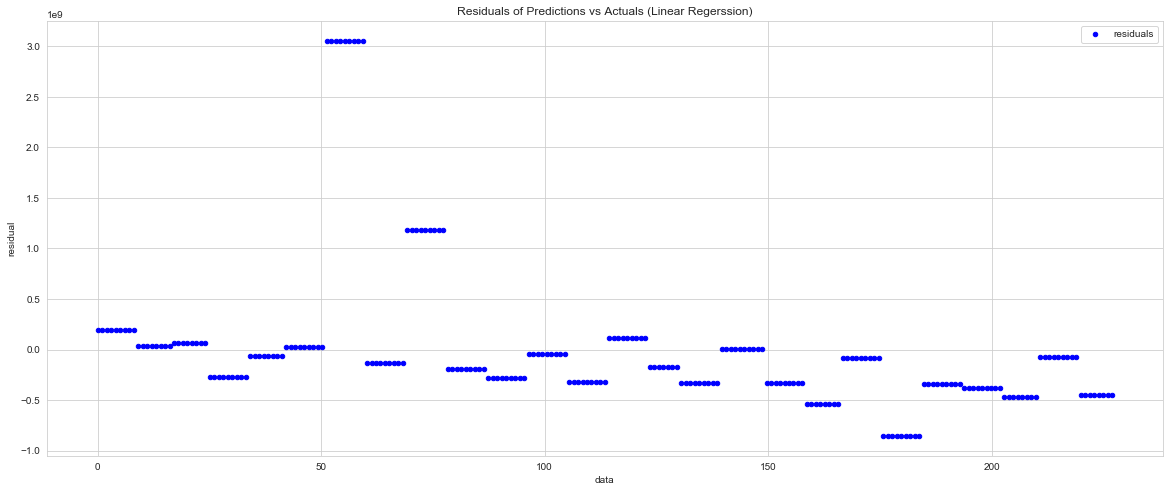

In [18]:
plot_residuals(y15, yhat15)

<h3>Residual Analysis</h3>

In [19]:
resid_15 = y15-yhat15
resid_15

797      1.953656e+08
798      1.953656e+08
799      1.953656e+08
800      1.953656e+08
801      1.953656e+08
802      1.953656e+08
803      1.953656e+08
804      1.953656e+08
805      1.953656e+08
1521     3.343472e+07
1522     3.343472e+07
1523     3.343472e+07
1524     3.343472e+07
1525     3.343472e+07
1526     3.343472e+07
1527     3.343472e+07
1528     3.343472e+07
3934     6.466687e+07
3935     6.466687e+07
3936     6.466687e+07
3937     6.466687e+07
3938     6.466687e+07
3939     6.466687e+07
3940     6.466687e+07
3941     6.466687e+07
4554    -2.727191e+08
4555    -2.727191e+08
4556    -2.727191e+08
4557    -2.727191e+08
4558    -2.727191e+08
             ...     
39224   -3.833855e+08
39225   -3.833855e+08
39226   -3.833855e+08
39227   -3.833855e+08
39228   -3.833855e+08
41119   -4.721493e+08
41120   -4.721493e+08
41121   -4.721493e+08
41122   -4.721493e+08
41123   -4.721493e+08
41124   -4.721493e+08
41125   -4.721493e+08
41126   -4.721493e+08
41785   -7.546613e+07
41786   -7

In [20]:
resid_15.describe()

count    2.270000e+02
mean    -1.855061e+07
std      7.184055e+08
min     -8.556037e+08
25%     -3.311379e+08
50%     -1.290900e+08
75%      2.484787e+07
max      3.053749e+09
dtype: float64

In [22]:
year = 2015
prelim_df_15 = get_data(year)
df_15 = clean_data(prelim_df_15, year)
df_15 = df_15[df_15['part_cnt_{}'.format(year)] > 100000]

In [23]:
df_15

,ein,pn,eir,sb_plan_type_code,part_cnt_2015,fndng_tgt_2015,tgt_nrml_cost_2015,fndng_tgt_2016,part_cnt_2016,type_pension_bnft_code,plan_name,sponsor_dfe_name,pmts_to_part_2015,tot_pmts_2015,data_year,pay_related,cash_bal,frozen,pbgc_takeover,not_qual
1134,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,1A1G3F3H,DUPONT PENSION AND RETIREMENT PLAN,"E. I. DU PONT DE NEMOURS & CO., INC",1.398545e+09,1.398545e+09,2015,True,False,False,False,False
1135,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,1A1G3F3H,DUPONT PENSION AND RETIREMENT PLAN,"E. I. DU PONT DE NEMOURS & CO., INC",1.398545e+09,1.398545e+09,2015,True,False,False,False,False
1136,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,1A1G3F3H,DUPONT PENSION AND RETIREMENT PLAN,"E. I. DU PONT DE NEMOURS & CO., INC",1.398545e+09,1.398545e+09,2015,True,False,False,False,False
1137,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,1A1G3F3H,DUPONT PENSION AND RETIREMENT PLAN,"E. I. DU PONT DE NEMOURS & CO., INC",1.398545e+09,1.398545e+09,2015,True,False,False,False,False
1138,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,1A3F3H,DUPONT PENSION AND RETIREMENT PLAN,"E. I. DU PONT DE NEMOURS & CO., INC",1.398545e+09,1.398545e+09,2015,True,False,False,False,False
1139,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,1A3F3H,DUPONT PENSION AND RETIREMENT PLAN,"E. I. DU PONT DE NEMOURS & CO., INC",1.398545e+09,1.398545e+09,2015,True,False,False,False,False
1140,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,1A3F3H,DUPONT PENSION AND RETIREMENT PLAN,E. I. DU PONT DE NEMOURS AND COMPANY,1.398545e+09,1.398545e+09,2015,True,False,False,False,False
1141,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,1A3F3H,DUPONT PENSION AND RETIREMENT PLAN,E. I. DU PONT DE NEMOURS AND COMPANY,1.398545e+09,1.398545e+09,2015,True,False,False,False,False
1142,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,1A3F3H,DUPONT PENSION AND RETIREMENT PLAN,E. I. DU PONT DE NEMOURS AND COMPANY,1.398545e+09,1.398545e+09,2015,True,False,False,False,False
1599,135315170,1,6.34,1,123346,11340524692,282205482.0,1.074636e+10,104840.0,1A3F,PFIZER CONSOLIDATED PENSION PLAN,PFIZER INC,2.378777e+09,2.378777e+09,2015,True,False,False,False,False


In [24]:
yhat15.index

Int64Index([  797,   798,   799,   800,   801,   802,   803,   804,   805,
             1521,
            ...
            41792, 41793, 42269, 42271, 42273, 42275, 42276, 42277, 42278,
            42279],
           dtype='int64', length=227)

In [ ]:
pd.DataFrame(yhat15).rename(columns={0:'Residual'})

In [25]:
df_15_full = df_15.merge(pd.DataFrame(yhat15).rename(columns={0:'Predicted_FT_2016'}),on=df_15.index,right_index=True)
df_15_full
#df_15[(~df_15.col1.isin(common.col1))&(~df1.col2.isin(common.col2))]

,key_0,ein,pn,eir,sb_plan_type_code,part_cnt_2015,fndng_tgt_2015,tgt_nrml_cost_2015,fndng_tgt_2016,part_cnt_2016,...,sponsor_dfe_name,pmts_to_part_2015,tot_pmts_2015,data_year,pay_related,cash_bal,frozen,pbgc_takeover,not_qual,Predicted_FT_2016
1134,1134,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,"E. I. DU PONT DE NEMOURS & CO., INC",1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10
1135,1135,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,"E. I. DU PONT DE NEMOURS & CO., INC",1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10
1136,1136,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,"E. I. DU PONT DE NEMOURS & CO., INC",1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10
1137,1137,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,"E. I. DU PONT DE NEMOURS & CO., INC",1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10
1138,1138,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,"E. I. DU PONT DE NEMOURS & CO., INC",1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10
1139,1139,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,"E. I. DU PONT DE NEMOURS & CO., INC",1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10
1140,1140,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,E. I. DU PONT DE NEMOURS AND COMPANY,1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10
1141,1141,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,E. I. DU PONT DE NEMOURS AND COMPANY,1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10
1142,1142,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,E. I. DU PONT DE NEMOURS AND COMPANY,1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10
1599,1599,135315170,1,6.34,1,123346,11340524692,282205482.0,1.074636e+10,104840.0,...,PFIZER INC,2.378777e+09,2.378777e+09,2015,True,False,False,False,False,1.071292e+10


In [26]:
df_15_full['Residual_16'] = df_15_full['fndng_tgt_2016'] - df_15_full['Predicted_FT_2016']

In [27]:
df_15_full

,key_0,ein,pn,eir,sb_plan_type_code,part_cnt_2015,fndng_tgt_2015,tgt_nrml_cost_2015,fndng_tgt_2016,part_cnt_2016,...,pmts_to_part_2015,tot_pmts_2015,data_year,pay_related,cash_bal,frozen,pbgc_takeover,not_qual,Predicted_FT_2016,Residual_16
1134,1134,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10,1.953656e+08
1135,1135,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10,1.953656e+08
1136,1136,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10,1.953656e+08
1137,1137,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10,1.953656e+08
1138,1138,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10,1.953656e+08
1139,1139,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10,1.953656e+08
1140,1140,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10,1.953656e+08
1141,1141,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10,1.953656e+08
1142,1142,510014090,1,6.20,1,137371,16272630339,202385631.0,1.662680e+10,134046.0,...,1.398545e+09,1.398545e+09,2015,True,False,False,False,False,1.643143e+10,1.953656e+08
1599,1599,135315170,1,6.34,1,123346,11340524692,282205482.0,1.074636e+10,104840.0,...,2.378777e+09,2.378777e+09,2015,True,False,False,False,False,1.071292e+10,3.343472e+07


In [28]:
df_15_full.describe()

,key_0,ein,pn,eir,part_cnt_2015,fndng_tgt_2015,tgt_nrml_cost_2015,fndng_tgt_2016,part_cnt_2016,pmts_to_part_2015,tot_pmts_2015,data_year,Predicted_FT_2016,Residual_16
count,227.000000,2.270000e+02,227.000000,227.000000,227.000000,2.270000e+02,2.270000e+02,2.270000e+02,227.000000,2.270000e+02,2.270000e+02,227.0,2.270000e+02,2.270000e+02
mean,21571.585903,4.316199e+08,16.140969,6.268326,164519.475771,1.292850e+10,2.476020e+08,1.319905e+10,160480.290749,1.172858e+09,1.178590e+09,2015.0,1.321760e+10,-1.855061e+07
std,13322.356628,2.963111e+08,42.620858,0.095870,46891.937364,8.553393e+09,2.261129e+08,8.701097e+09,46643.008118,1.119375e+09,1.116949e+09,0.0,8.595202e+09,7.316745e+09
min,1134.000000,6.057098e+07,1.000000,6.120000,100806.000000,2.644145e+09,3.564664e+07,2.784296e+09,101182.000000,9.520751e+07,9.520751e+07,2015.0,3.129568e+09,-2.676729e+10
25%,7191.500000,2.019208e+08,1.000000,6.200000,122457.000000,7.093134e+09,1.016073e+08,7.376932e+09,113099.000000,6.193810e+08,6.226095e+08,2015.0,7.452398e+09,-3.170951e+09
50%,20725.000000,3.705331e+08,1.000000,6.230000,177567.000000,1.134052e+10,1.730760e+08,1.100254e+10,165345.000000,7.666021e+08,7.873110e+08,2015.0,1.084343e+10,-7.546613e+07
75%,32534.500000,7.206512e+08,5.000000,6.340000,184094.000000,1.602181e+10,2.822055e+08,1.651649e+10,185811.000000,1.437638e+09,1.437638e+09,2015.0,1.645182e+10,3.053749e+09
max,42625.000000,9.517321e+08,201.000000,6.530000,294925.000000,4.088939e+10,9.189551e+08,4.069247e+10,287809.000000,5.318195e+09,5.318195e+09,2015.0,3.951443e+10,2.556642e+10


<h3>Graph of Predicted 2016 Funding Target vs Actual 2016 Funding Target<br>
All Plans</h3>

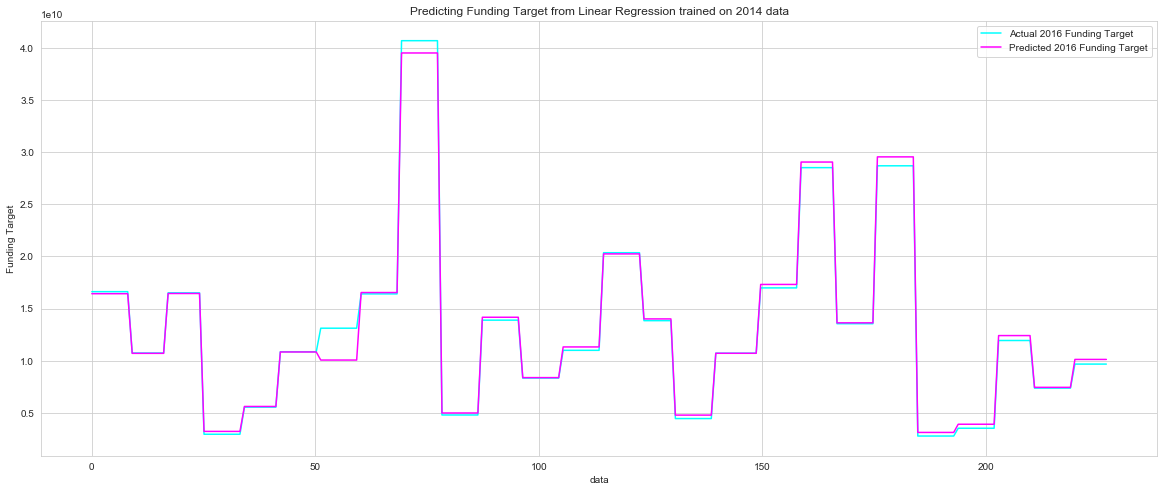

In [30]:
num_to_plot = len(y15)
y_true = y15
y_pred = yhat15
xx = np.linspace(0,num_to_plot,num_to_plot)
plt.figure(figsize=(20,8))
plt.plot(xx, y_true, color='cyan', label='Actual 2016 Funding Target')
plt.plot(xx, y_pred, color='magenta', label='Predicted 2016 Funding Target' )
#plt.scatter(y_true,y_pred, s=20, color=next(colors), label="data")
plt.xlabel("data")
plt.ylabel("Funding Target")
plt.title("Predicting Funding Target from Linear Regression trained on 2014 data")
plt.legend()
plt.show()